# Run to prepare environment for the challenge

In [6]:
!pip install duckdb
import duckdb

# Create a connection
conn = duckdb.connect(database=':memory:', read_only=False)

# Create the orders table
conn.execute("""
CREATE TABLE orders (
    order_id INTEGER,
    dealership_id INTEGER,
    status VARCHAR,
    total_cost DOUBLE,
    technician VARCHAR,
    order_date DATE
);
""")

# Create the events table
conn.execute("""
CREATE TABLE events (
    event_id INTEGER,
    order_id INTEGER,
    status VARCHAR,
    cost DOUBLE,
    date_time TIMESTAMP
);
""")

# Create the events table
conn.execute("""
CREATE TABLE technicians (
    technician_id INTEGER,
    name VARCHAR,
    expertise VARCHAR
);
""")

# Create the events table
conn.execute("""
CREATE TABLE dealerships (
    dealership_id INTEGER,
    location VARCHAR,
    manager VARCHAR,
    name VARCHAR
);
""")

# Insert some sample data into the orders table
conn.execute("""
INSERT INTO orders VALUES
(100, 2, 'Completed', 85.00, 'James Brown', '2023-08-01'),
(101, 1, 'Completed', 161.0, 'Jane Smith', '2023-08-10'),
(102, 2, 'In Progress', 175.5, 'James Brown', '2023-08-11'),
(103, 3, 'Completed', 216.0, 'Mary Johnson', '2023-08-10'),
(104, 4, 'Completed', 175.0, 'Robert White', '2023-08-11');
""")

# Insert some sample data into the events table
conn.execute("""
INSERT INTO events VALUES
(1, 100, 'In Progress', 0.00, '2023-08-01 08:00:00'),
(2, 100, 'Completed', 85.00, '2023-08-01 09:00:00'),
(1, 101, 'Received', 40.00, '2023-08-10 08:00:00'),
(2, 101, 'In Progress', 50.25, '2023-08-10 10:00:00'),
(3, 102, 'In Progress', 80.00, '2023-08-10 12:00:00'),
(4, 104, 'Received', 40.00, '2023-08-11 08:00:00'),
(5, 104, 'In Progress', 45.00, '2023-08-11 10:00:00'),
(6, 102, 'Received', 40.00, '2023-08-10 08:30:00'),
(7, 102, 'In Progress', 55.50, '2023-08-10 10:30:00'),
(8, 101, 'Completed', 70.75, '2023-08-10 14:00:00'),
(9, 103, 'Received', 60.00, '2023-08-10 09:00:00'),
(10, 103, 'In Progress', 45.50, '2023-08-10 11:00:00'),
(11, 104, 'Completed', 90.00, '2023-08-11 12:30:00'),
(12, 103, 'Completed', 110.50, '2023-08-10 15:00:00');
""")

# Insert sample data into technicians table
conn.execute("""
INSERT INTO technicians VALUES
(1001, 'Jane Smith', 'Brakes'),
(1002, 'James Brown', 'Transmission'),
(1003, 'Mary Johnson', 'Engine'),
(1004, 'Robert White', 'Tires');
""")

# Insert sample data into dealerships table
conn.execute("""
INSERT INTO dealerships VALUES
(1, 'New York', 'John Doe', 'Doe Dealership'),
(2, 'Los Angeles', 'Jane Lee', 'Jane Dealership'),
(3, 'Chicago', 'Jim Bean', 'Jim Bean Ford'),
(4, 'Houston', 'Jill Ray', 'Houston Toyota');
""")

# Analytics Engineer Challenge: Repair Order Analysis

**Background:**

You are an analytics engineer working for a major automotive service provider. Your task is to analyze the repair order data from various dealerships. You have access to several tables in a DuckDB database as prepared in the cells above:

1. `orders`: Contains repair order details including order ID, dealership ID, status, total cost, and technician ID.
2. `events`: Records event updates for each repair order, including changes to status, cost, and timestamps.
3. `technicians`: Information about technicians including their ID, name, and expertise.
4. `dealerships`: Information about each dealership, including its ID, location, and manager.

Your challenge is to write SQL queries to derive meaningful insights from this data, considering the temporal sequence of events and complex relationships between the tables.

**Tasks:**

1. **CTE for Event Summaries**: Create a CTE that summarizes the events for each order, including the earliest and latest status, total cost, and count of events for each order.

2. **Window Function for Running Costs**: Using a window function, calculate the running total of the cost for each dealership, ordered by `date_time` within the events table.

3. **Joining Tables and Analyzing Data**:
    a. Join the `orders`, `events`, `technicians`, and `dealerships` tables.
    b. Provide insights into the progress and cost trends of each order.
    c. Identify the top-performing technicians and dealerships.

4. **Bonus Task (Optional)**: Create a visualization using the results of your analysis that highlights key trends or findings.

**Schema:**

Here are the tables and their respective columns:

- `orders`: `order_id, dealership_id, status, total_cost, technician_id, order_date`
- `events`: `event_id, order_id, status, cost, date_time`
- `technicians`: `technician_id, name, expertise`
- `dealerships`: `dealership_id, location, manager`

**Hints:**

- You may need to use subqueries, aggregation functions, window functions, and CTEs to accomplish these tasks.
- Consider the chronological sequence of events and handle updates or changes to existing orders.
- Explore correlations between the technicians' expertise, the number of orders handled, and other metrics that may lead to interesting insights.

### Deliverables:

Please provide the SQL queries for each of the tasks, along with a brief explanation of the insights or findings derived from the queries. If you choose to complete the bonus task, include the code and visualization as well.

By completing this challenge, you will demonstrate your ability to handle complex SQL queries, utilize advanced features like CTEs and window functions, and derive meaningful insights from a real-world dataset. Feel free to add more data or complexity if it aligns with the goals of your analysis.

Note: The SQL code for creating tables, inserting sample data, and setting up the database environment are executed in this Google Colab notebook in this step. You may need to adjust the data to match the complexity of the challenge.

## Solution 1: CTE for Event Summaries

In [17]:
# Define the CTE and query
"""
created a Common Table Expression (CTE) named EventSummaries to summarize the events for each order, including the earliest and
 latest status, total cost, and count of events.
"""
event_summary_query = """
WITH EventSummaries AS (
    SELECT
        e.order_id,
        (SELECT status FROM events WHERE order_id = e.order_id ORDER BY date_time ASC LIMIT 1) AS earliest_status,
        (SELECT status FROM events WHERE order_id = e.order_id ORDER BY date_time DESC LIMIT 1) AS latest_status,
        SUM(COALESCE(e.cost, 0)) AS total_cost,
        COUNT(*) AS event_count
    FROM events e
    GROUP BY e.order_id
)
SELECT
    es.order_id,
    earliest_status,
    es.latest_status,
    es.total_cost,
    es.event_count
FROM EventSummaries es;
"""

# Execute the query
result_CTE = conn.execute(event_summary_query)

# Fetch the result as a Pandas DataFrame (useful for further analysis or visualization)
df_es = result_CTE.fetchdf()

# Print the DataFrame
df_es

,order_id,earliest_status,latest_status,total_cost,event_count
0,100,In Progress,Completed,85.0,2
1,101,Received,Completed,161.0,3
2,102,Received,In Progress,175.5,3
3,103,Received,Completed,216.0,3
4,104,Received,Completed,175.0,3


## Solution 2: Window Function for Running Costs

In [24]:
# calculating running totals


"""
SQL Query Description:
This SQL query calculates the running totals of costs for each dealership, ordered by date and time.

Query Breakdown:
1. Select Statement:
   - It selects the dealership ID, event date and time, and the running total of costs.
2. Window Function (SUM(...)):
   - SUM(E.cost) OVER (PARTITION BY O.dealership_id ORDER BY E.date_time ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)`: This window function calculates the running total of costs for each dealership.
   - PARTITION BY O.dealership_id` ensures that the running total is calculated separately for each dealership.
   - ORDER BY E.date_time orders the events by date and time.
   - ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW` specifies the window frame, indicating that the running total includes all rows from the start of the partition up to the current row.
3. Join:
   - The orders and events tables are joined using the order_id column to retrieve the necessary data for calculation.

Execution and Result:
- The query is executed, and the result is fetched as a Pandas DataFrame for further analysis or visualization.
"""


Running_totals = """
select O.dealership_id,E.date_time,SUM(E.cost) OVER (partition by O.dealership_id ORDER BY E.date_time
      ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) running_costs
from orders O, events E
where O.order_id=E.order_id
order by O.dealership_id,E.date_time;
"""

# Execute the query
result_RT = conn.execute(Running_totals)

# Fetch the result as a Pandas DataFrame (useful for further analysis or visualization)
df_RT = result_RT.fetchdf()

# Print the DataFrame
df_RT



,dealership_id,date_time,running_costs
0,1,2023-08-10 08:00:00,40.00
1,1,2023-08-10 10:00:00,90.25
2,1,2023-08-10 14:00:00,161.00
3,2,2023-08-01 08:00:00,0.00
4,2,2023-08-01 09:00:00,85.00
5,2,2023-08-10 08:30:00,125.00
6,2,2023-08-10 10:30:00,180.50
7,2,2023-08-10 12:00:00,260.50
8,3,2023-08-10 09:00:00,60.00
9,3,2023-08-10 11:00:00,105.50


# Solution 3: Joining Tables and Analyzing Data:

In [18]:
# joining all 4 tables
Joining_tables = """
select *
from orders O, events E, technicians T, dealerships D
where O.order_id=E.order_id
and O.technician=T.name /*technician_id was missing in Orders table so used name for join*/
and O.dealership_id=D.dealership_id
order by O.dealership_id,E.date_time;
"""

# Execute the query
result_JT = conn.execute(Joining_tables)

# Fetch the result as a Pandas DataFrame (useful for further analysis or visualization)
df_JT = result_JT.fetchdf()

# Print the DataFrame
df_JT



,order_id,dealership_id,status,total_cost,technician,order_date,event_id,order_id_1,status_1,cost,date_time,technician_id,name,expertise,dealership_id_1,location,manager,name_1
0,101,1,Completed,161.0,Jane Smith,2023-08-10,1,101,Received,40.00,2023-08-10 08:00:00,1001,Jane Smith,Brakes,1,New York,John Doe,Doe Dealership
1,101,1,Completed,161.0,Jane Smith,2023-08-10,2,101,In Progress,50.25,2023-08-10 10:00:00,1001,Jane Smith,Brakes,1,New York,John Doe,Doe Dealership
2,101,1,Completed,161.0,Jane Smith,2023-08-10,8,101,Completed,70.75,2023-08-10 14:00:00,1001,Jane Smith,Brakes,1,New York,John Doe,Doe Dealership
3,100,2,Completed,85.0,James Brown,2023-08-01,1,100,In Progress,0.00,2023-08-01 08:00:00,1002,James Brown,Transmission,2,Los Angeles,Jane Lee,Jane Dealership
4,100,2,Completed,85.0,James Brown,2023-08-01,2,100,Completed,85.00,2023-08-01 09:00:00,1002,James Brown,Transmission,2,Los Angeles,Jane Lee,Jane Dealership
5,102,2,In Progress,175.5,James Brown,2023-08-11,6,102,Received,40.00,2023-08-10 08:30:00,1002,James Brown,Transmission,2,Los Angeles,Jane Lee,Jane Dealership
6,102,2,In Progress,175.5,James Brown,2023-08-11,7,102,In Progress,55.50,2023-08-10 10:30:00,1002,James Brown,Transmission,2,Los Angeles,Jane Lee,Jane Dealership
7,102,2,In Progress,175.5,James Brown,2023-08-11,3,102,In Progress,80.00,2023-08-10 12:00:00,1002,James Brown,Transmission,2,Los Angeles,Jane Lee,Jane Dealership
8,103,3,Completed,216.0,Mary Johnson,2023-08-10,9,103,Received,60.00,2023-08-10 09:00:00,1003,Mary Johnson,Engine,3,Chicago,Jim Bean,Jim Bean Ford
9,103,3,Completed,216.0,Mary Johnson,2023-08-10,10,103,In Progress,45.50,2023-08-10 11:00:00,1003,Mary Johnson,Engine,3,Chicago,Jim Bean,Jim Bean Ford


In [19]:
progress_cost_trends = """
WITH OrderProgress AS (
    SELECT
        o.order_id,
        o.order_date,
        e.event_id,
        e.date_time,
        e.status AS event_status,
        e.cost AS event_cost,
        ROW_NUMBER() OVER (PARTITION BY o.order_id ORDER BY e.date_time) AS event_sequence
    FROM orders o
    JOIN events e ON o.order_id = e.order_id
),
OrderCostTrends AS (
    SELECT
        op.order_id,
        op.order_date,
        op.event_id,
        op.date_time,
        op.event_status,
        op.event_cost,
        op.event_sequence,
        SUM(op.event_cost) OVER (PARTITION BY op.order_id ORDER BY op.event_sequence) AS cumulative_cost
    FROM OrderProgress op
)
SELECT
    oct.order_id,
    oct.order_date,
    oct.event_id,
    oct.date_time,
    oct.event_status,
    oct.event_cost,
    oct.cumulative_cost,
    o.dealership_id,
    o.status AS order_status,
    o.total_cost AS order_total_cost,
    t.name AS technician_name,
    d.location AS dealership_location
FROM OrderCostTrends oct
JOIN orders o ON oct.order_id = o.order_id
JOIN technicians t ON o.technician = t.name
JOIN dealerships d ON o.dealership_id = d.dealership_id
ORDER BY oct.order_id, oct.event_sequence;

"""
# Execute the query
result_CT = conn.execute(progress_cost_trends)

# Fetch the result as a Pandas DataFrame (useful for further analysis or visualization)
df_CT = result_CT.fetchdf()

# Print the DataFrame
df_CT

,order_id,order_date,event_id,date_time,event_status,event_cost,cumulative_cost,dealership_id,order_status,order_total_cost,technician_name,dealership_location
0,100,2023-08-01,1,2023-08-01 08:00:00,In Progress,0.00,0.00,2,Completed,85.0,James Brown,Los Angeles
1,100,2023-08-01,2,2023-08-01 09:00:00,Completed,85.00,85.00,2,Completed,85.0,James Brown,Los Angeles
2,101,2023-08-10,1,2023-08-10 08:00:00,Received,40.00,40.00,1,Completed,161.0,Jane Smith,New York
3,101,2023-08-10,2,2023-08-10 10:00:00,In Progress,50.25,90.25,1,Completed,161.0,Jane Smith,New York
4,101,2023-08-10,8,2023-08-10 14:00:00,Completed,70.75,161.00,1,Completed,161.0,Jane Smith,New York
5,102,2023-08-11,6,2023-08-10 08:30:00,Received,40.00,40.00,2,In Progress,175.5,James Brown,Los Angeles
6,102,2023-08-11,7,2023-08-10 10:30:00,In Progress,55.50,95.50,2,In Progress,175.5,James Brown,Los Angeles
7,102,2023-08-11,3,2023-08-10 12:00:00,In Progress,80.00,175.50,2,In Progress,175.5,James Brown,Los Angeles
8,103,2023-08-10,9,2023-08-10 09:00:00,Received,60.00,60.00,3,Completed,216.0,Mary Johnson,Chicago
9,103,2023-08-10,10,2023-08-10 11:00:00,In Progress,45.50,105.50,3,Completed,216.0,Mary Johnson,Chicago


In [20]:
#Top Performing Technicians
Top_technicians ="""
SELECT
    t.name AS technician_name,
    SUM(o.total_cost) AS total_cost_of_orders
FROM
    technicians t
JOIN
    orders o ON t.name = o.technician
GROUP BY
    t.name
ORDER BY
    total_cost_of_orders DESC;
"""

# Execute the query
result_TECH = conn.execute(Top_technicians)

# Fetch the result as a Pandas DataFrame (useful for further analysis or visualization)
df_TECH = result_TECH.fetchdf()

# Print the DataFrame
df_TECH


,technician_name,total_cost_of_orders
0,James Brown,260.5
1,Mary Johnson,216.0
2,Robert White,175.0
3,Jane Smith,161.0


In [22]:
#Top-Performing Dealerships by Total Number of Orders Handled:
Top_Delearships = """
SELECT
    d.location AS dealership_location,
    COUNT(o.order_id) AS total_orders_handled
FROM
    dealerships d
JOIN
    orders o ON d.dealership_id = o.dealership_id
GROUP BY
    d.location
ORDER BY
    total_orders_handled DESC;
"""

# Execute the query
result_DELER = conn.execute(Top_Delearships)

# Fetch the result as a Pandas DataFrame (useful for further analysis or visualization)
df_DELER = result_DELER.fetchdf()

# Print the DataFrame
df_DELER


,dealership_location,total_orders_handled
0,Los Angeles,2
1,Chicago,1
2,Houston,1
3,New York,1


## Bonus Task

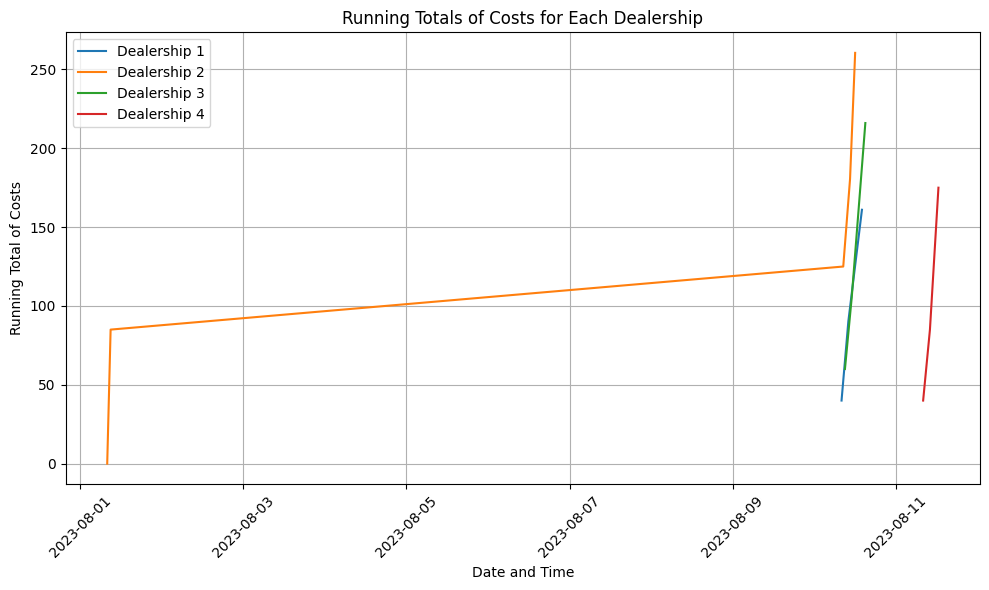

In [25]:
import matplotlib.pyplot as plt

# Extract data from the DataFrame
dealership_ids = df_RT['dealership_id']
date_times = df_RT['date_time']
running_costs = df_RT['running_costs']

# Create a line plot
plt.figure(figsize=(10, 6))
for dealership_id in dealership_ids.unique():
    plt.plot(date_times[dealership_ids == dealership_id], running_costs[dealership_ids == dealership_id], label=f'Dealership {dealership_id}')

# Customize the plot
plt.title('Running Totals of Costs for Each Dealership')
plt.xlabel('Date and Time')
plt.ylabel('Running Total of Costs')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [26]:
Visulal = """
SELECT
    o.status AS order_status,
    COUNT(*) AS num_orders
FROM
    orders o
JOIN
    events e ON o.order_id = e.order_id
GROUP BY
    o.status;
"""

# Execute the query
result_visul = conn.execute(Visulal)

# Fetch the result as a Pandas DataFrame (useful for further analysis or visualization)
df_visul = result_visul.fetchdf()

# Print the DataFrame
df_visul


,order_status,num_orders
0,In Progress,3
1,Completed,11


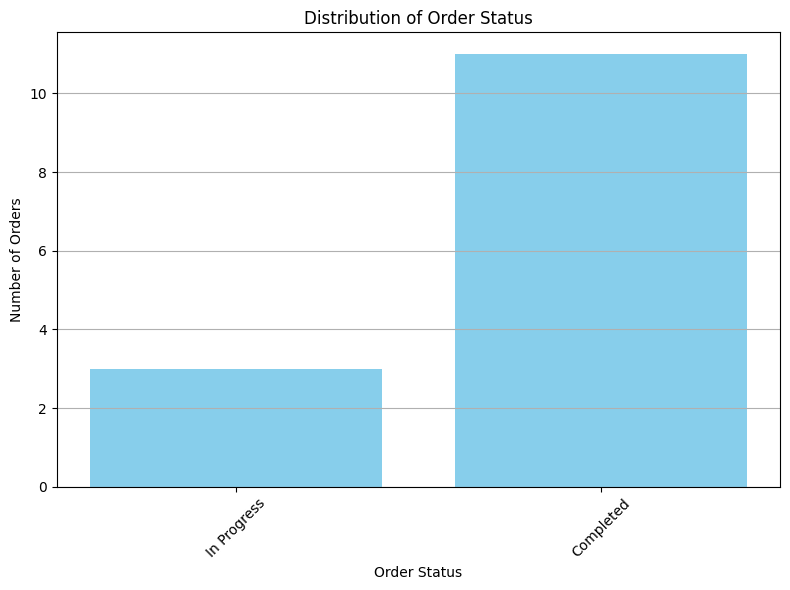

In [27]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(df_visul['order_status'], df_visul['num_orders'], color='skyblue')

# Customize the plot
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()
